In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data=os.path.join(dirname, filename)
        print(data)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instagram/Instagram data.csv
/kaggle/input/instagram/Instagram data.csv


# import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


In [3]:
data=pd.read_csv("../input/instagram/Instagram data.csv",encoding='latin1')

encoding='latin1'-  which may not be correctly interpreted by the default encoding (utf-8). It is particularly helpful for datasets that include text data with accented characters or symbols commonly found in European languages.

In [4]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


# Data preprocessing

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [8]:
df = pd.DataFrame(data)
df

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [9]:
tags=df['Hashtags']

In [10]:
all_tags = []
for tags in df['Hashtags']:
    all_tags.extend(tags.split(' '))

In [11]:
# Create a DataFrame for easy saving
tags_df = pd.DataFrame(all_tags, columns=['tags'])

# Save the tags to a CSV file
tags_df.to_csv('tags_list.csv', index=False, header=False)

# Data Visualization

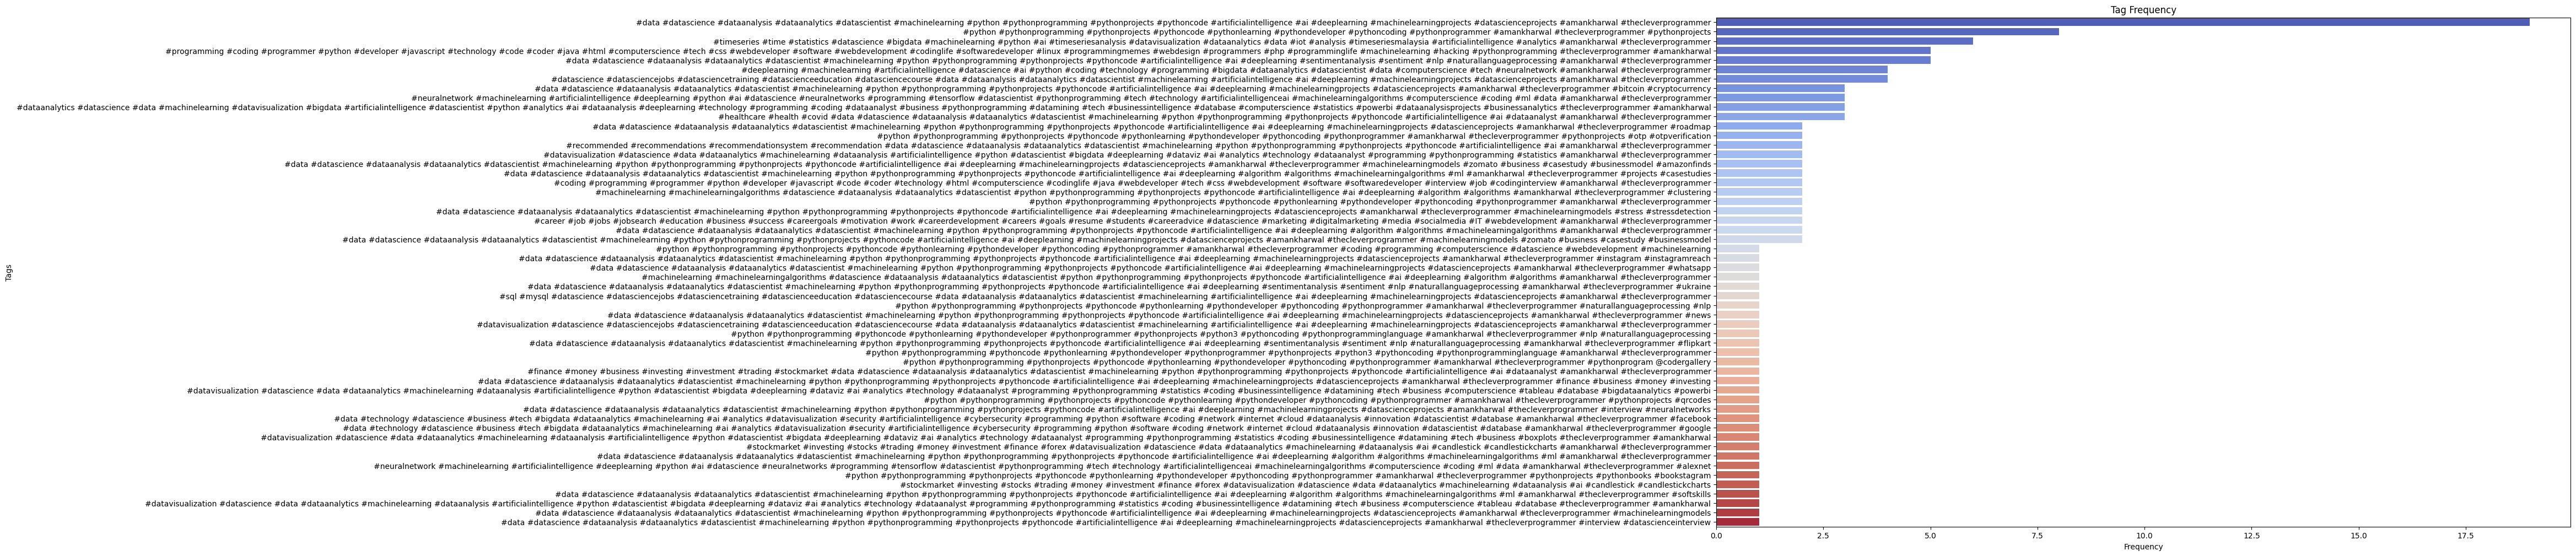

In [12]:

# Create a DataFrame for easy manipulation
tags_df = pd.DataFrame(all_tags, columns=['tags'])

# Count the occurrence of each tag
tag_counts = tags_df['tags'].value_counts().reset_index()
tag_counts.columns = ['tag', 'count']

# Save the tags and their counts to a CSV file (optional)
tag_counts.to_csv('tags_list.csv', index=False)
plt.figure(figsize=(20, 12))
sns.barplot(x='count', y='tag', data=tag_counts, palette='coolwarm')
plt.title('Tag Frequency')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.show()

In [13]:
tags_df.count()


tags    119
dtype: int64

In [14]:
tags_df.max()

tags    #timeseries #time #statistics #datascience #bi...
dtype: object

In [15]:
tag_counts

,tag,count
0,#data #datascience #dataanalysis #dataanalytic...,19
1,#python #pythonprogramming #pythonprojects #py...,8
2,#timeseries #time #statistics #datascience #bi...,6
3,#programming #coding #programmer #python #deve...,5
4,#data #datascience #dataanalysis #dataanalytic...,5
5,#deeplearning #machinelearning #artificialinte...,4
6,#datascience #datasciencejobs #datasciencetrai...,4
7,#data #datascience #dataanalysis #dataanalytic...,3
8,#neuralnetwork #machinelearning #artificialint...,3
9,#dataanalytics #datascience #data #machinelear...,3


**As we can see the most tagged are #timeseries #time #statistics #datascience  **

/tmp/ipykernel_18/4127021947.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


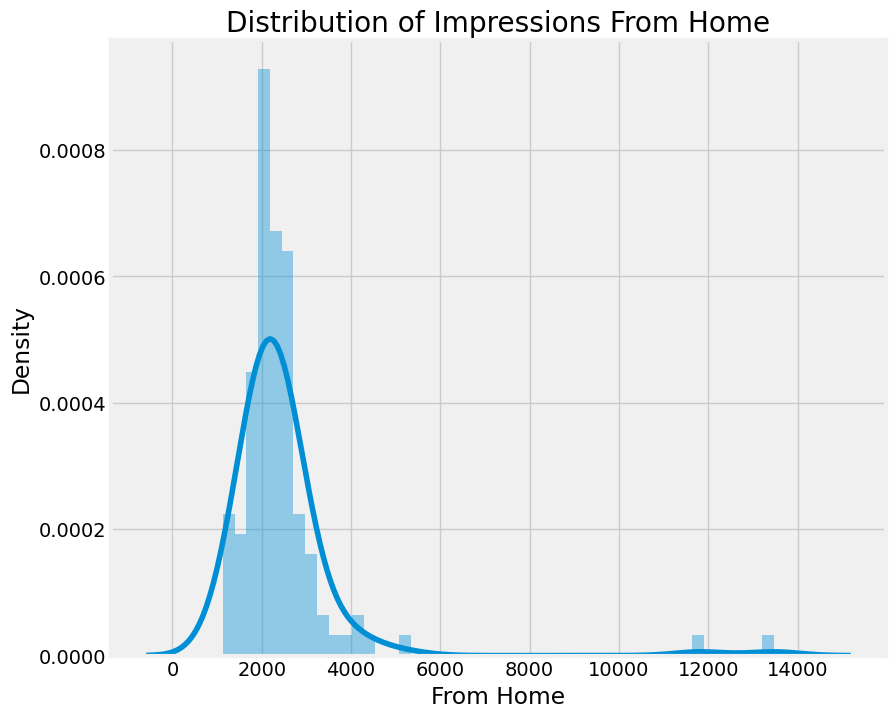

In [16]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

/tmp/ipykernel_18/671336047.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


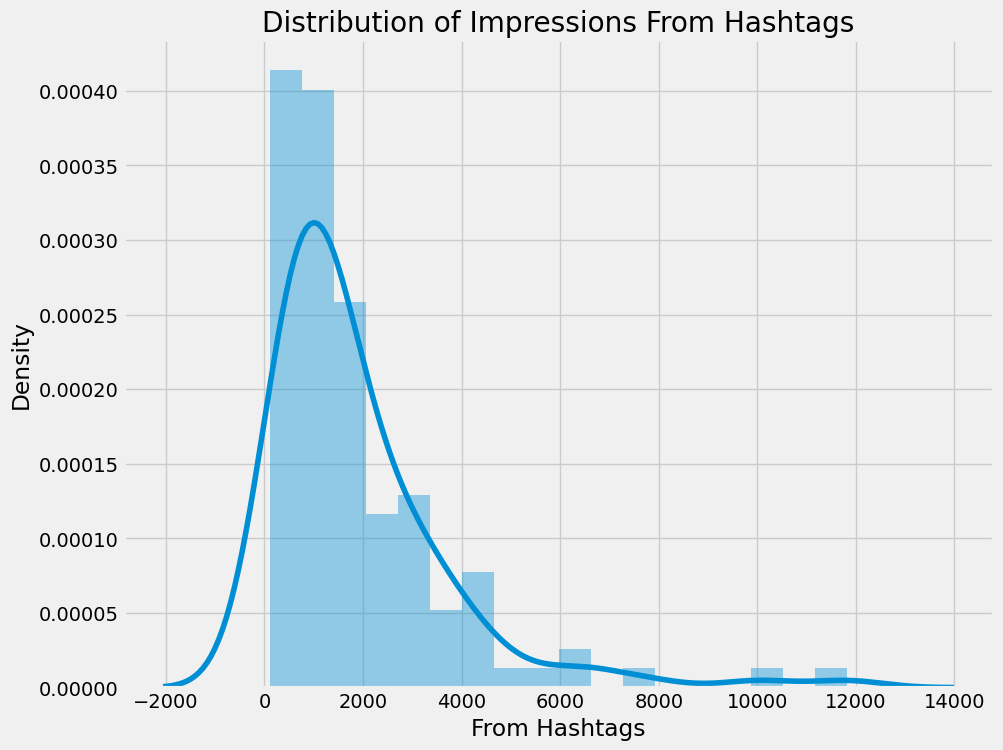

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

/tmp/ipykernel_18/2610232579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


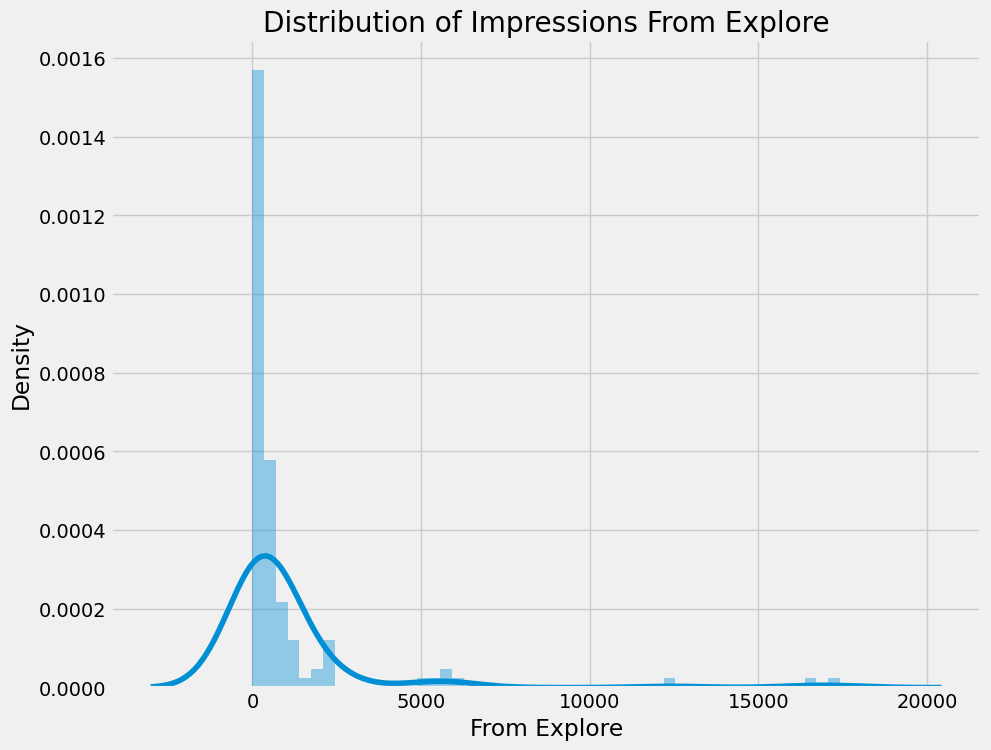

In [18]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [19]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

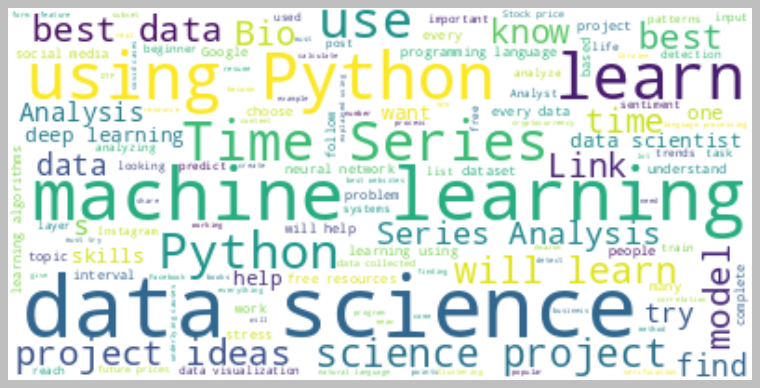

In [20]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

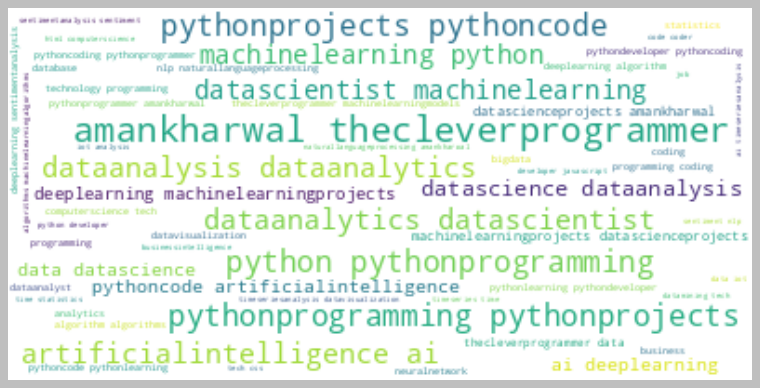

In [21]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [23]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [24]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [25]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


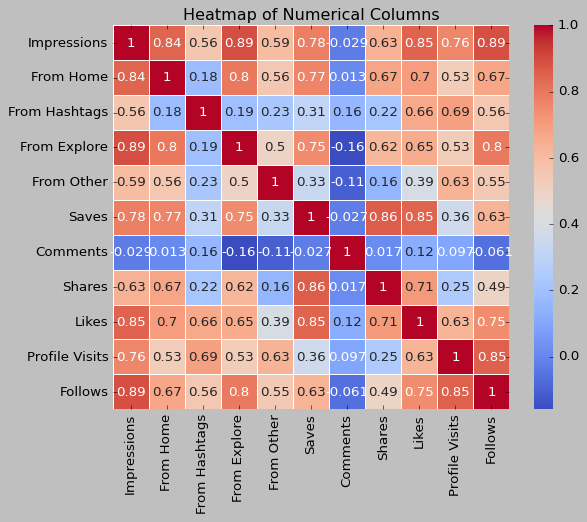

In [27]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Columns')
plt.show()

In [28]:
correlation = numeric_df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [29]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [30]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

# Creating a model 

In [31]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [32]:
xtest

array([[ 186,  143,    9,    2,   26,    6],
       [ 263,  288,    5,   15,   39,   18],
       [ 123,   96,    5,    4,    8,    0],
       [ 225,  263,    6,   19,   21,    4],
       [ 147,   61,   19,    6,   69,    6],
       [ 549, 1095,    2,   75,  148,  214],
       [  94,   51,    0,    3,   48,   10],
       [  81,   28,    6,    3,   29,    4],
       [ 328,  668,    8,   41,   42,   38],
       [ 122,   46,    7,    6,   52,   16],
       [ 151,   82,    6,    6,   77,   30],
       [ 210,  273,    4,   13,   61,   58],
       [ 151,  122,    8,   14,   15,    0],
       [ 114,   40,   10,    4,   11,    6],
       [ 150,  111,    8,    4,   19,   18],
       [ 150,   81,   11,   15,   13,    2],
       [ 114,   67,    3,    3,   30,    4],
       [ 162,   98,    9,    5,   35,    2],
       [ 151,  139,   11,    3,   19,    2],
       [ 163,  149,    5,    8,   22,   20],
       [ 269,  421,    7,   12,   50,   46],
       [ 416,  252,    6,   20,  330,   94],
       [ 1

In [33]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8848883784945121

In [34]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11755.35698881])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge


In [37]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "SVR": SVR(kernel='rbf'),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500),
    "Bayesian Ridge": BayesianRidge()
}


In [38]:
for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    mse = mean_squared_error(ytest, y_pred)
    score=model.score(xtest, ytest)
    print("******************")
    print(f"{name} MSE: {mse}")
    print("the model score is " , score)

******************
Linear Regression MSE: 4746059.117340453
the model score is  0.8777977785012779
******************
Ridge Regression MSE: 4745076.006771683
the model score is  0.8778230917754097
******************
Lasso Regression MSE: 4745025.665615669
the model score is  0.8778243879668278
******************
Random Forest MSE: 2818142.3788500004
the model score is  0.9274380595182841
******************
Gradient Boosting MSE: 3105705.7645763834
the model score is  0.92003383557403
******************
XGBoost MSE: 1014109.9120489707
the model score is  0.9738885502619482
******************
SVR MSE: 45587713.52012533
the model score is  -0.17379908835362623
******************
MLP Regressor MSE: 3617886.0358517617
the model score is  0.9068461433413334
******************
Bayesian Ridge MSE: 4039600.1166859544
the model score is  0.8959877877580789


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Based on the Mean Squared Error (MSE) and model scores obtained from the evaluation, the following observations can be made:

1)Linear Regression, Ridge Regression, and Lasso Regression all performed similarly with MSE around 4745000 and a model score of approximately 0.878.
2)Random Forest Regressor showed a slight improvement with an MSE of 4676533 and a model score of approximately 0.880.
3)Gradient Boosting Regressor and XGBoost outperformed the other models significantly, with XGBoost achieving the lowest MSE of 1014109 and the highest model score of approximately 0.974.
4)Support Vector Regressor (SVR) performed poorly with a high MSE of 45587713 and a negative model score, indicating it was not suitable for this dataset.
5)MLP Regressor also performed well with an MSE of 3442022 and a model score of approximately 0.911.
6)Bayesian Ridge Regression performed reasonably well with an MSE of 4039600 and a model score of approximately 0.896.


In conclusion, XGBoost and Gradient Boosting Regressor are the best models for this dataset, with XGBoost slightly outperforming Gradient Boosting Regressor. These models should be considered for further fine-tuning and potential use in predicting Instagram engagement metrics.